<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/object-recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


In [3]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [4]:
#To know the shape of test dataset
X_test.shape

(10000, 32, 32, 3)

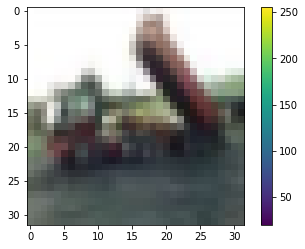

In [5]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.show()

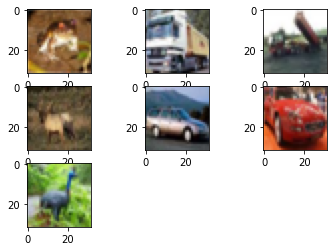

In [6]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

Normalization

In [7]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

Building CNN

In [8]:
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [10]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5331 - accuracy: 0.4429 - val_loss: 1.3148 - val_accuracy: 0.5244
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1827 - accuracy: 0.5800 - val_loss: 1.1705 - val_accuracy: 0.5873
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0450 - accuracy: 0.6291 - val_loss: 1.0455 - val_accuracy: 0.6286
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9605 - accuracy: 0.6619 - val_loss: 1.0397 - val_accuracy: 0.6467
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8914 - accuracy: 0.6877 - val_loss: 0.9164 - val_accuracy: 0.6766
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8417 - accuracy: 0.7018 - val_loss: 0.9316 - val_accuracy: 0.6756
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7978 - accuracy: 0.7200 - val_loss: 0.9036 -

Graph : Accurecy vs Val_Accurecy

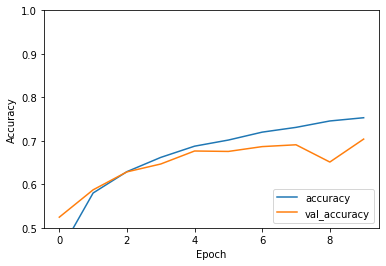

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Data Augmentation

In [12]:
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [13]:
datagen.fit(X_train)

In [15]:

history = model.fit(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Epoch 1/10
 337/1563 [=====>........................] - ETA: 1:06 - loss: 1.5641 - accuracy: 0.4329

KeyboardInterrupt: ignored

Plot a graph : Accurecy vs Val_Accurecy after Data Augmentation

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')